<a href="https://colab.research.google.com/github/u0empty/portpo/blob/main/theme_stock_yubin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 분석에 필요한 라이브러리 설치
! pip install -U finance-datareader
! pip install -U pykrx

In [ ]:
# 분석에 필요한 라이브러리 불러오기
import FinanceDataReader as fdr
from pykrx import stock
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#  # kospi와 kosdaq에 상장된 종목정보를 엑셀로 저장

In [ ]:
# KRX : KRX 종목 전체
# KOSPI : KOSPI 종목
# KOSDAQ : KOSDAQ 종목
# KONEX : KONEX 종목
# NASDAQ : 나스닥 종목
# NYSE : 뉴욕증권거래소 종목
# SP500 : S&P500 종목
df_kospi = fdr.StockListing("KOSPI")

In [ ]:
# kospi 상장종목 전체 가져오기
df_kospi.head()

Symbol Market  ...                       HomePage Region
1  095570  KOSPI  ...         http://www.ajnet.co.kr  서울특별시
2  006840  KOSPI  ...  http://www.aekyunggroup.co.kr  서울특별시
6  152100  KOSPI  ...                            NaN    NaN
7  295820  KOSPI  ...                            NaN    NaN
8  253150  KOSPI  ...                            NaN    NaN

[5 rows x 10 columns]

In [ ]:
# 행과 열의 크기 확인
df_kospi.shape

(5196, 10)

In [ ]:
# 기술통계량 요약
df_kospi.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


Symbol Market  ...                    HomePage Region
count     5196   5196  ...                         791    820
unique    5196      1  ...                         777     19
top     610005  KOSPI  ...  http://imt@kmaringroup.com  서울특별시
freq         1   5196  ...                           2    416
first      NaN    NaN  ...                         NaN    NaN
last       NaN    NaN  ...                         NaN    NaN

[6 rows x 10 columns]

In [ ]:
# 결측치가 있는 종목 제거
df_kospi = df_kospi.dropna(axis=0)

# 행과 열의 크기 확인
df_kospi.shape

(782, 10)

In [ ]:
# 같은 방법으로 KOSDAQ에 상장된 종목정보 가져오기
df_kosdaq = fdr.StockListing("KOSDAQ")
df_kosdaq.shape

(1546, 10)

In [ ]:
# 결측치가 있는 종목 제거
# 행과 열의 크기 확인
df_kosdaq = df_kosdaq.dropna(axis=0)
df_kosdaq.shape

(1409, 10)

In [ ]:
#index=False

# 코스피, 코스닥 기간 변경후, 실행할 것
# 전처리된 파일을 excel파일로 
df_kospi.to_excel('/gdrive/MyDrive/Colab Notebooks/Kospi0.xlsx',index=False)
df_kosdaq.to_excel('/gdrive/MyDrive/Colab Notebooks/Kosdaq0.xlsx',index=False)

#  # Data Preprocessing(전처리)

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
# FinanceDataReader에서 얻은 파일_kospi_kosdaq
kospi = pd.read_excel('/gdrive/MyDrive/Colab Notebooks/Kospi0.xlsx')
kosdaq = pd.read_excel('/gdrive/MyDrive/Colab Notebooks/Kosdaq0.xlsx')

In [ ]:
# Symbol: 종목코드
kospi_code = kospi["Symbol"]
kosdaq_code = kosdaq["Symbol"]

In [ ]:
# Name: 회사명
kospi_name = kospi["Name"]
kosdaq_name = kosdaq["Name"]

In [ ]:
# 종목코드를 6자리로 맞춰주는 과정_kospi
# "123".zfill(6) -> 000123
kospi_code_df = []
for i in range(len(kospi_code)):
        a = str(kospi_code.iloc[i]).zfill(6)
        kospi_code_df.append(a)

In [ ]:
# 종목코드를 6자리로 맞춰주는 과정_kosdaq
# "123".zfill(6) -> 000123
kosdaq_code_df = []
for i in range(len(kosdaq_code)):
        a = str(kosdaq_code.iloc[i]).zfill(6)
        kosdaq_code_df.append(a)

In [ ]:
# for문 예시
Samsung = fdr.DataReader('005930', '2020-07-07', '2020-08-31')
Samsung["Close"]

Date
2020-07-07    53400
2020-07-08    53000
2020-07-09    52800
2020-07-10    52700
2020-07-13    53400
2020-07-14    53800
2020-07-15    54700
2020-07-16    53800
2020-07-17    54400
2020-07-20    54200
2020-07-21    55300
2020-07-22    54700
2020-07-23    54100
2020-07-24    54200
2020-07-27    55600
2020-07-28    58600
2020-07-29    59000
2020-07-30    59000
2020-07-31    57900
2020-08-03    56800
2020-08-04    57300
2020-08-05    56900
2020-08-06    58000
2020-08-07    57500
2020-08-10    57800
2020-08-11    58200
2020-08-12    59000
2020-08-13    58700
2020-08-14    58000
2020-08-18    58400
2020-08-19    57800
2020-08-20    55400
2020-08-21    55900
2020-08-24    56100
2020-08-25    56400
2020-08-26    56400
2020-08-27    55600
2020-08-28    55400
2020-08-31    54000
Name: Close, dtype: int64

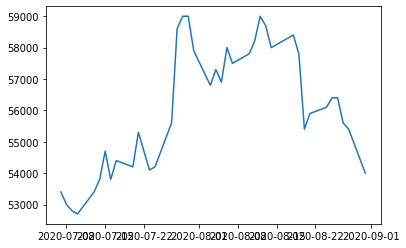

In [ ]:
# 그래프 예시
plt.plot(Samsung["Close"])

In [ ]:
# 한국판 뉴딜 발표: 20.07.14
# 사건 발생 일주일 전부터 4주간의 기간을 관찰
kospi_df = {}
for i in kospi_code_df:
    value = fdr.DataReader(i,'2020-07-07', '2020-08-04')
    kospi_df[i] = value["Close"]
kospi_df

{'000020': Date
 2020-07-07    15100
 2020-07-08    15200
 2020-07-09    16050
 2020-07-10    16350
 2020-07-13    16000
 2020-07-14    16800
 2020-07-15    15700
 2020-07-16    15200
 2020-07-17    15550
 2020-07-20    16300
 2020-07-21    16750
 2020-07-22    21650
 2020-07-23    23700
 2020-07-24    23050
 2020-07-27    23000
 2020-07-28    23450
 2020-07-29    24050
 2020-07-30    23300
 2020-07-31    24400
 2020-08-03    24050
 2020-08-04    26000
 Name: Close, dtype: int64, '000040': Date
 2020-07-07    720
 2020-07-08    716
 2020-07-09    707
 2020-07-10    761
 2020-07-13    782
 2020-07-14    769
 2020-07-15    795
 2020-07-16    798
 2020-07-17    796
 2020-07-20    783
 2020-07-21    763
 2020-07-22    750
 2020-07-23    750
 2020-07-24    731
 2020-07-27    738
 2020-07-28    724
 2020-07-29    724
 2020-07-30    716
 2020-07-31    712
 2020-08-03    686
 2020-08-04    702
 Name: Close, dtype: int64, '000050': Date
 2020-07-07    12050
 2020-07-08    11950
 2020-07-09    1

In [ ]:
# 한국판 뉴딜 발표: 20.07.14
# 사건 발생 일주일 전부터 4주간의 기간을 관찰
kosdaq_df = {}
for i in kosdaq_code_df:
    value = fdr.DataReader(i,'2020-07-07', '2020-08-04')
    kosdaq_df[i] = value["Close"]

In [ ]:
Kospi = pd.DataFrame(kospi_df)
Kosdaq = pd.DataFrame(kosdaq_df)

In [ ]:
Kospi

095570  006840  027410  282330  ...  005010  069260  000540  003280
Date                                        ...                                
2020-07-07    3370   19200    4365  141000  ...    6580   16100    2325    1555
2020-07-08    3340   19000    4345  137500  ...    6670   16050    2330    1555
2020-07-09    3330   18850    4420  135500  ...    6700   15900    2315    1555
2020-07-10    3265   18900    4295  129500  ...    6710   15550    2290    1555
2020-07-13    3290   18950    4285  128500  ...    6750   16000    2260    1555
2020-07-14    3210   18800    4320  126500  ...    6790   16100    2230    1555
2020-07-15    3260   19050    4400  129000  ...    6980   16200    2240    1555
2020-07-16    3355   18900    4400  128000  ...    6930   16500    2255    1555
2020-07-17    3400   18850    4360  129000  ...    6970   16300    2245    1555
2020-07-20    3580   18800    4360  127500  ...    7120   16200    2220    1555
2020-07-21    3565   19050    4335  127000  ...    7150   16950    2230    1555
2020-07-22    3540   18900    4295  128500  ...    7190   16550    2260    1555
2020-07-23    3380   19000    4200  127000  ...    7180   16300    2240    1555
2020-07-24    3300   18850    4160  128000  ...    7110   16450    2245    1555
2020-07-27    3310   19000    4220  127000  ...    7060   16550    2255    1555
2020-07-28    3280   18950    4235  126000  ...    7160   16950    2245    1555
2020-07-29    3260   18850    4210  124500  ...    7120   16700    2230    1555
2020-07-30    3230   18150    4245  125000  ...    7080   16800    2230    1555
2020-07-31    3190   18050    4210  124500  ...    7070   16650    2215    1555
2020-08-03    3180   17750    4210  121500  ...    7060   16350    2210    1555
2020-08-04    3240   17900    4245  122000  ...    7060   16400    2230    1555

[21 rows x 782 columns]

In [ ]:
Kospi.columns = kospi_name
Kosdaq.columns = kosdaq_name
Kospi = Kospi.transpose()
Kosdaq = Kosdaq.transpose()

In [ ]:
Day = []
for i in range(1,len(Kospi.columns)+1):
    Day.append("Day"+str(i))

In [ ]:
Kospi.columns = Day
Kosdaq.columns = Day

In [ ]:
Kospi

Day1      Day2      Day3  ...     Day19     Day20     Day21
Name                                   ...                              
AJ네트웍스     3370.0    3340.0    3330.0  ...    3190.0    3180.0    3240.0
AK홀딩스     19200.0   19000.0   18850.0  ...   18050.0   17750.0   17900.0
BGF        4365.0    4345.0    4420.0  ...    4210.0    4210.0    4245.0
BGF리테일   141000.0  137500.0  135500.0  ...  124500.0  121500.0  122000.0
BNK금융지주    5060.0    5150.0    5160.0  ...    5140.0    5070.0    5160.0
...           ...       ...       ...  ...       ...       ...       ...
휴비스        6100.0    6090.0    5970.0  ...    6590.0    6850.0    6910.0
휴스틸        6580.0    6670.0    6700.0  ...    7070.0    7060.0    7060.0
휴켐스       16100.0   16050.0   15900.0  ...   16650.0   16350.0   16400.0
흥국화재       2325.0    2330.0    2315.0  ...    2215.0    2210.0    2230.0
흥아해운       1555.0    1555.0    1555.0  ...    1555.0    1555.0    1555.0

[782 rows x 21 columns]

In [ ]:
# 코스피, 코스닥 기간 변경후, 실행할 것
# 전처리된 파일을 excel파일로 
Kospi.to_excel('/gdrive/MyDrive/Colab Notebooks/Kospi_200707_200804.xlsx')
Kosdaq.to_excel('/gdrive/MyDrive/Colab Notebooks/Kosdaq_200707_200804.xlsx')

#  # scaled data(스케일링) + clustering(군집화)

In [ ]:
! pip install -U finance-datareader
! pip install -U pykrx
! pip install tslearn
! pip install -U sklearn

     |████████████████████████████████| 85 kB 4.3 MB/s 
     |████████████████████████████████| 60 kB 7.2 MB/s 
     |████████████████████████████████| 251 kB 45.1 MB/s 
     |████████████████████████████████| 793 kB 31.2 MB/s 


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from tslearn.clustering import TimeSeriesKMeans
from tslearn.generators import random_walks
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from pykrx import stock
import matplotlib.pyplot as plt
%matplotlib inline
import FinanceDataReader as fdr
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
# excel에서 scaling 후 실행할 것
Kospi_DF = pd.read_excel('/gdrive/MyDrive/Colab Notebooks/Kospi_200707_200804(scl).xlsx', sheet_name = 'Scaling')
Kosdaq_DF = pd.read_excel('/gdrive/MyDrive/Colab Notebooks/Kosdaq_200707_200804(scl).xlsx', sheet_name = 'Scaling')

In [ ]:
Kospi_DF

Name      Day1      Day2  ...     Day19     Day20     Day21
0     AJ네트웍스  0.475000  0.400000  ...  0.025000  0.000000  0.150000
1      AK홀딩스  1.000000  0.862069  ...  0.206897  0.000000  0.103448
2        BGF  0.788462  0.711538  ...  0.192308  0.192308  0.326923
3     BGF리테일  1.000000  0.820513  ...  0.153846  0.000000  0.025641
4    BNK금융지주  0.125000  0.500000  ...  0.458333  0.166667  0.541667
..       ...       ...       ...  ...       ...       ...       ...
777      휴비스  0.138298  0.127660  ...  0.659574  0.936170  1.000000
778      휴스틸  0.000000  0.147541  ...  0.803279  0.786885  0.786885
779      휴켐스  0.392857  0.357143  ...  0.785714  0.571429  0.607143
780     흥국화재  0.958333  1.000000  ...  0.041667  0.000000  0.166667
781     흥아해운 -1.000000 -1.000000  ... -1.000000 -1.000000 -1.000000

[782 rows x 22 columns]

In [ ]:
Day = []
for i in range(1,len(Kospi_DF.columns)):
    Day.append("Day"+str(i))

In [ ]:
Kospi_DF.set_index('Name', inplace=True)
Kosdaq_DF.set_index('Name', inplace=True)

In [ ]:
#결측값 제거
for i in Day:
    index_kospi = Kospi_DF[Kospi_DF[i]==-1].index
    index_kosdaq = Kosdaq_DF[Kosdaq_DF[i]==-1].index
    Kospi_DF.drop(index_kospi, inplace=True)
    Kosdaq_DF.drop(index_kosdaq, inplace=True)

In [ ]:
DF = pd.concat([Kospi_DF,Kosdaq_DF])
DF.shape

(1994, 21)

In [ ]:
DF

Day1      Day2      Day3  ...     Day19     Day20     Day21
Name                                   ...                              
AJ네트웍스   0.475000  0.400000  0.375000  ...  0.025000  0.000000  0.150000
AK홀딩스    1.000000  0.862069  0.758621  ...  0.206897  0.000000  0.103448
BGF      0.788462  0.711538  1.000000  ...  0.192308  0.192308  0.326923
BGF리테일   1.000000  0.820513  0.717949  ...  0.153846  0.000000  0.025641
BNK금융지주  0.125000  0.500000  0.541667  ...  0.458333  0.166667  0.541667
...           ...       ...       ...  ...       ...       ...       ...
휴젤       0.885449  0.857585  0.746130  ...  0.244582  0.000000  0.083591
흥국       0.000000  0.141304  0.260870  ...  0.413043  0.347826  0.467391
흥국에프엔비   1.000000  0.857143  0.775510  ...  0.204082  0.102041  0.000000
희림       0.297872  0.297872  0.276596  ...  1.000000  0.659574  0.680851
힘스       0.744186  0.930233  1.000000  ...  0.674419  0.744186  0.697674

[1994 rows x 21 columns]

In [ ]:
a = DF.to_numpy()
a = a.reshape(1994,21,1)
a

array([[[0.475     ],
        [0.4       ],
        [0.375     ],
        ...,
        [0.025     ],
        [0.        ],
        [0.15      ]],

       [[1.        ],
        [0.86206897],
        [0.75862069],
        ...,
        [0.20689655],
        [0.        ],
        [0.10344828]],

       [[0.78846154],
        [0.71153846],
        [1.        ],
        ...,
        [0.19230769],
        [0.19230769],
        [0.32692308]],

       ...,

       [[1.        ],
        [0.85714286],
        [0.7755102 ],
        ...,
        [0.20408163],
        [0.10204082],
        [0.        ]],

       [[0.29787234],
        [0.29787234],
        [0.27659574],
        ...,
        [1.        ],
        [0.65957447],
        [0.68085106]],

       [[0.74418605],
        [0.93023256],
        [1.        ],
        ...,
        [0.6744186 ],
        [0.74418605],
        [0.69767442]]])

In [ ]:
# 군집 중심점과의 유클리디안 거리 계산
dist = []
K = range(1,22) # day1~day21
for k in K:
    km = TimeSeriesKMeans(n_clusters = k, metric = 'euclidean', max_iter = 5, random_state = 0).fit(a)
    km.fit(a)
    dist.append(km.inertia_)

In [ ]:
dist

[1.8252679460646777,
 1.2468356997962056,
 1.0865321928874894,
 0.9913552285739468,
 0.923448853043752,
 0.8821739458685695,
 0.841641013763927,
 0.8079394399159446,
 0.7889117845446834,
 0.7644428626461842,
 0.7415778779210722,
 0.7310468753016823,
 0.7164972360991849,
 0.7095199829191584,
 0.6978658491857617,
 0.6807198706773997,
 0.6694066908336984,
 0.6590652687539039,
 0.6474994700164292,
 0.6407398055798251,
 0.6352560266336452]

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


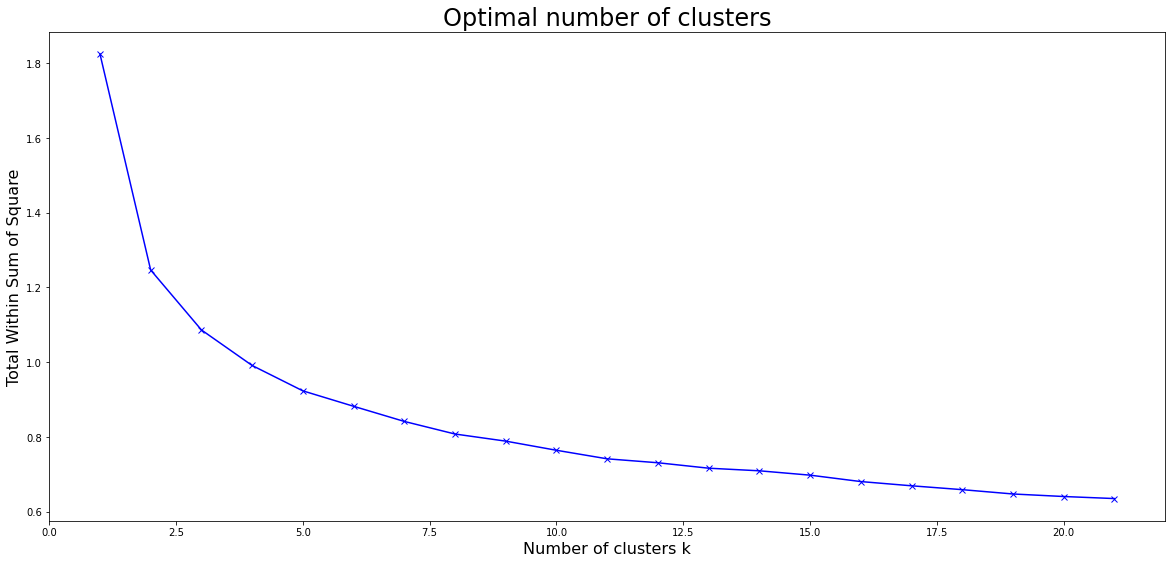

In [ ]:
# 군집 수 결정_elbow point
plt.figure(figsize=(20,9))
plt.plot(K,dist,'bx-')
plt.xlabel('Number of clusters k', fontsize=16)
plt.ylabel('Total Within Sum of Square', fontsize=16)
plt.title("Optimal number of clusters", fontsize=24)
plt.show()

In [ ]:
km = TimeSeriesKMeans(n_clusters = 7, metric = 'euclidean', max_iter = 5, random_state = 0).fit(a)

In [ ]:
# 상관관계 계산(코사인 유사도, 스캐터플롯, 상관계수)
# 뉴딜 수혜 DF 언급 >> 상관계수언급 >> 그래프언급
km_center = km.cluster_centers_
km_center.shape

(7, 21, 1)

In [ ]:
center = km_center
pred = km.fit_predict(a)
DF['cluster'] = pred

In [ ]:
DF.shape

(1994, 22)

In [ ]:
DF

Day1      Day2      Day3  ...     Day20     Day21  cluster
Name                                   ...                             
AJ네트웍스   0.475000  0.400000  0.375000  ...  0.000000  0.150000        0
AK홀딩스    1.000000  0.862069  0.758621  ...  0.000000  0.103448        2
BGF      0.788462  0.711538  1.000000  ...  0.192308  0.326923        2
BGF리테일   1.000000  0.820513  0.717949  ...  0.000000  0.025641        4
BNK금융지주  0.125000  0.500000  0.541667  ...  0.166667  0.541667        0
...           ...       ...       ...  ...       ...       ...      ...
휴젤       0.885449  0.857585  0.746130  ...  0.000000  0.083591        2
흥국       0.000000  0.141304  0.260870  ...  0.347826  0.467391        5
흥국에프엔비   1.000000  0.857143  0.775510  ...  0.102041  0.000000        2
희림       0.297872  0.297872  0.276596  ...  0.659574  0.680851        1
힘스       0.744186  0.930233  1.000000  ...  0.744186  0.697674        4

[1994 rows x 22 columns]

In [ ]:
# 최종 군집화된 파일을 excel파일로 
# DF.to_excel('/gdrive/MyDrive/Colab Notebooks/DF.xlsx')

#  # Visualization(시각화)

In [ ]:
# DF[DF['cluster']==6].index

Index(['DI동일', 'E1', 'JW생명과학', 'JW중외제약', 'JW홀딩스', 'KTis', 'LG', 'LIG넥스원',
       'LS네트웍스', 'NH프라임리츠',
       ...
       '현대바이오', '현대사료', '현대에버다임', '현대에이치티', '형지I&C', '홈센타홀딩스', '화일약품', '휴메딕스',
       '휴온스', '휴온스글로벌'],
      dtype='object', name='Name', length=381)

In [ ]:
# C0 / 5G 관련주 / 올라갔다가 내려감
DF.loc[['대한광통신','라온시큐어','기가레인','한국정보인증','포스코 ICT','KCC'],'cluster':]

cluster
Name            
대한광통신          0
라온시큐어          0
기가레인           0
한국정보인증         0
포스코 ICT        0
KCC            0

In [ ]:
# C1 / 반도체 관련 / 올라감
DF.loc[['LG화학','삼성SDI','KG케미칼','DB하이텍','HMM','HDC'],'cluster':]

cluster
Name          
LG화학         1
삼성SDI        1
KG케미칼        1
DB하이텍        1
HMM          1
HDC          1

In [ ]:
# C2 / 유통 관련 / 내려감
DF.loc[['GS리테일','CJ대한통운','CJ','이엠코리아','제이엔케이히터','유니크'],'cluster':]

cluster
Name            
GS리테일          2
CJ대한통운         2
CJ             2
이엠코리아          2
제이엔케이히터        2
유니크            2

In [ ]:
 # C3 / 스토리지주(클라우드 등) / 멈칫올라감
DF.loc[['알서포트','데이타솔루션','유비케어','에스넷','나무기술','한국정보통신'],'cluster':]

cluster
Name           
알서포트          3
데이타솔루션        3
유비케어          3
에스넷           3
나무기술          3
한국정보통신        3

In [ ]:
# C4 / IT 관련주 / 내려갔다가 회복
DF.loc[['링네트','오픈베이스','소프트센', '파워넷','아이즈비전','한국전자금융'],'cluster':]

cluster
Name           
링네트           4
오픈베이스         4
소프트센          4
파워넷           4
아이즈비전         4
한국전자금융        4

In [ ]:
# C5 / 2차전지(수소, 전기) / 멈칫올라감
DF.loc[['유니슨','씨에스베어링','두산퓨얼셀','삼영엠텍','동국S&C','동국산업'],'cluster':]

cluster
Name           
유니슨           5
씨에스베어링        5
두산퓨얼셀         5
삼영엠텍          5
동국S&C         5
동국산업          5

In [ ]:
# C6 / 바이오주 / 올라감
DF.loc[['JW생명과학','씨에스윈드','삼강엠앤티','두산중공업','E1', '현대바이오'],'cluster':]

cluster
Name           
JW생명과학        6
씨에스윈드         6
삼강엠앤티         6
두산중공업         6
E1            6
현대바이오         6

In [ ]:
# 각 군집에 할당된 그룹을 묶기
for i in range(7):
    globals()["C{}".format(i)] = DF[DF['cluster']==i]

In [ ]:
# 각 군집 전처리
C0_name = C0.index
C1_name = C1.index
C2_name = C2.index
C3_name = C3.index
C4_name = C4.index
C5_name = C5.index
C6_name = C6.index

C0 = C0.transpose()
C1 = C1.transpose()
C2 = C2.transpose()
C3 = C3.transpose()
C4 = C4.transpose()
C5 = C5.transpose()
C6 = C6.transpose()

C0.drop(['cluster'], inplace=True)
C1.drop(['cluster'], inplace=True)
C2.drop(['cluster'], inplace=True)
C3.drop(['cluster'], inplace=True)
C4.drop(['cluster'], inplace=True)
C5.drop(['cluster'], inplace=True)
C6.drop(['cluster'], inplace=True)

C0_mean = C0.loc[Day,:].mean(axis=1)
C1_mean = C1.loc[Day,:].mean(axis=1)
C2_mean = C2.loc[Day,:].mean(axis=1)
C3_mean = C3.loc[Day,:].mean(axis=1)
C4_mean = C4.loc[Day,:].mean(axis=1)
C5_mean = C5.loc[Day,:].mean(axis=1)
C6_mean = C6.loc[Day,:].mean(axis=1)

C0['mean'] = C0_mean
C1['mean'] = C1_mean
C2['mean'] = C2_mean
C3['mean'] = C3_mean
C4['mean'] = C4_mean
C5['mean'] = C5_mean
C6['mean'] = C6_mean

Text(0, 0.5, 'Price')

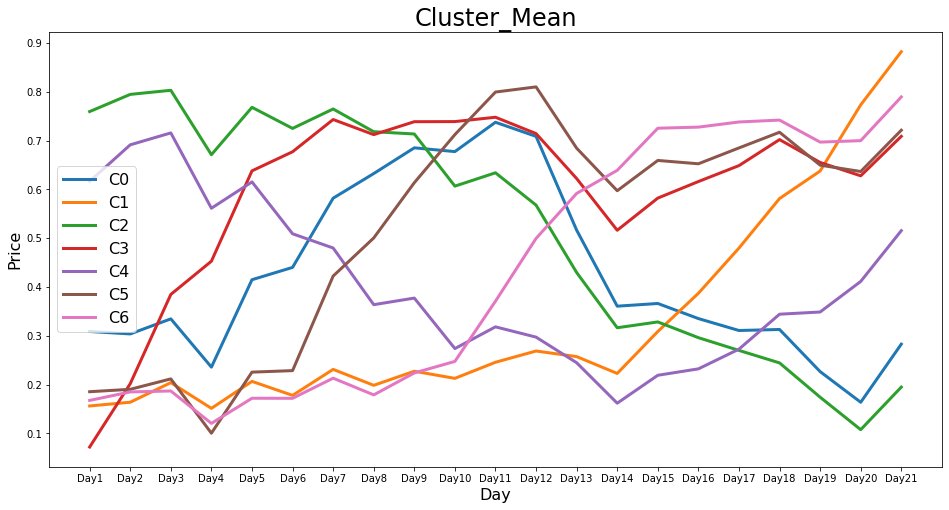

In [ ]:
# 전체 군집 시각화
plt.figure(figsize=(16,8))
plt.plot(C0['mean'], linewidth=3)
plt.plot(C1['mean'], linewidth=3)
plt.plot(C2['mean'], linewidth=3)
plt.plot(C3['mean'], linewidth=3)
plt.plot(C4['mean'], linewidth=3)
plt.plot(C5['mean'], linewidth=3)
plt.plot(C6['mean'], linewidth=3)
plt.legend(labels=['C0','C1','C2','C3','C4','C5','C6'], loc='best', fontsize=16)
plt.title("Cluster_Mean", fontsize=24)
plt.xlabel("Day", fontsize=16)
plt.ylabel("Price", fontsize=16)

In [ ]:
# 코사인 유사도 계산
Cos_sim = []
for i in range(len(km_center)):
    for j in range(len(km_center)):
        Cos_sim.append(cosine_similarity(km_center[i].T, km_center[j].T)[0][0])
Cos_sim

In [ ]:
# 코사인 유사도 계산 결과 요약
Cos_sim_DF = pd.DataFrame()
for i in range(len(km_center)):
    Cos_sim_DF['C'+str(i)] = Cos_sim[7*i:(7*i)+7]
Cos_sim_DF.index = Cos_sim_DF.columns

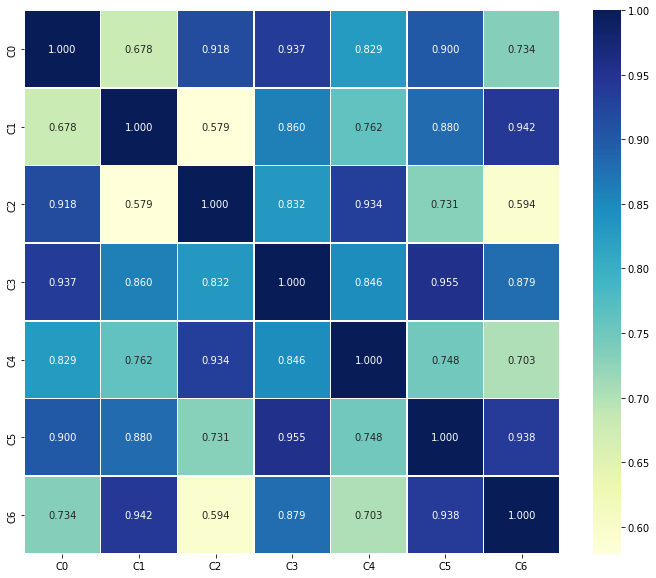

In [ ]:
# 코사인 유사도 계산 결과 시각화
plt.figure(figsize=(12,10))
sns.heatmap(data = Cos_sim_DF, annot=True, fmt = '.3f', linewidths=.5, cmap='YlGnBu')

In [ ]:
# 군집의 중심점과 가까운 30개의 종목 선정
C0_trans = C0.transpose()
C0_list = []
for i in range(len(C0_trans)):
    temp = C0_trans.iloc[i,:].to_numpy()
    temp = temp.reshape(-1,1)
    C0_list.append(cosine_similarity(km_center[0].T, temp.T)[0][0])

C0_trans['cos_sim'] = C0_list

C0_trans['rank_by_min'] = C0_trans['cos_sim'].rank(method='min', ascending=False)
rank_C0=C0_trans['rank_by_min']
C0_ind= rank_C0[rank_C0<=30].index
C0_ind

Index(['DL', 'GKL', '메리츠화재', '삼성엔지니어링', '상상인증권', '세방', '세종공업', '평화홀딩스',
       '포스코인터내셔널', '한국전력', '한국프랜지', '현대건설', '현대그린푸드', 'RFHIC', '국일신동', '기가레인',
       '뉴프렉스', '대성엘텍', '디케이락', '모트렉스', '비에이치아이', '서울전자통신', '서진오토모티브', '아우딘퓨쳐스',
       '에치에프알', '엔텔스', '지엔원에너지', '큐캐피탈', '휘닉스소재', 'mean'],
      dtype='object', name='Name')

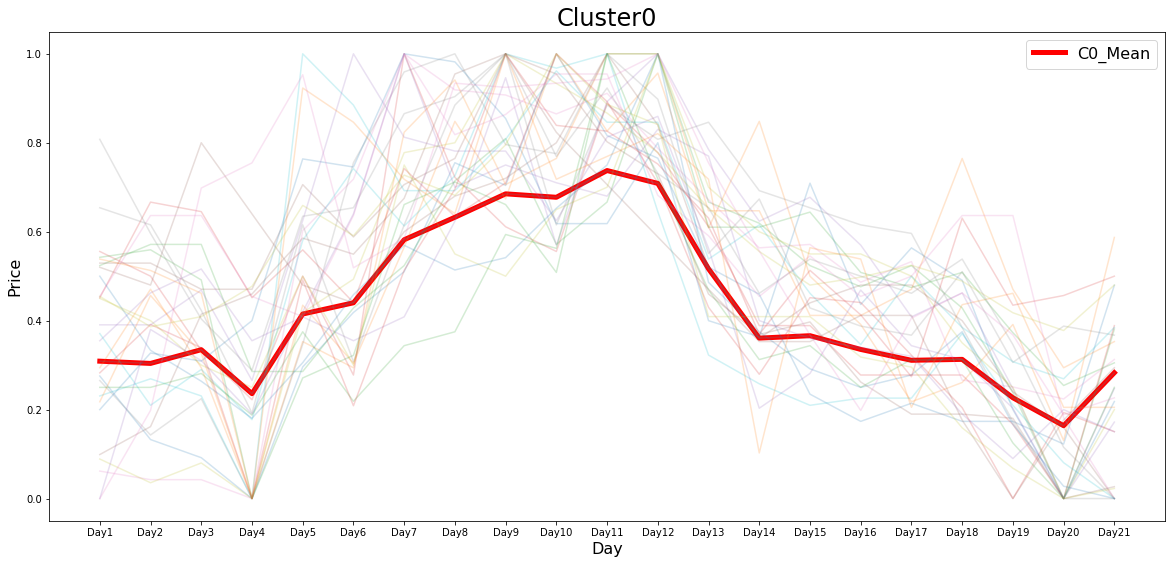

In [ ]:
# 시각화
plt.figure(figsize=(20,9))
plt.plot(C0['mean'],'r', linewidth=5)#, marker='|', mec='black', mew=3, ms=10)
plt.title("Cluster0", fontsize=24)
plt.xlabel("Day", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.legend(labels=['C0_Mean'], loc='best', fontsize=16)
plt.plot(C0_trans.loc[C0_ind,C0_trans.columns[:21]].transpose(), alpha=0.2)

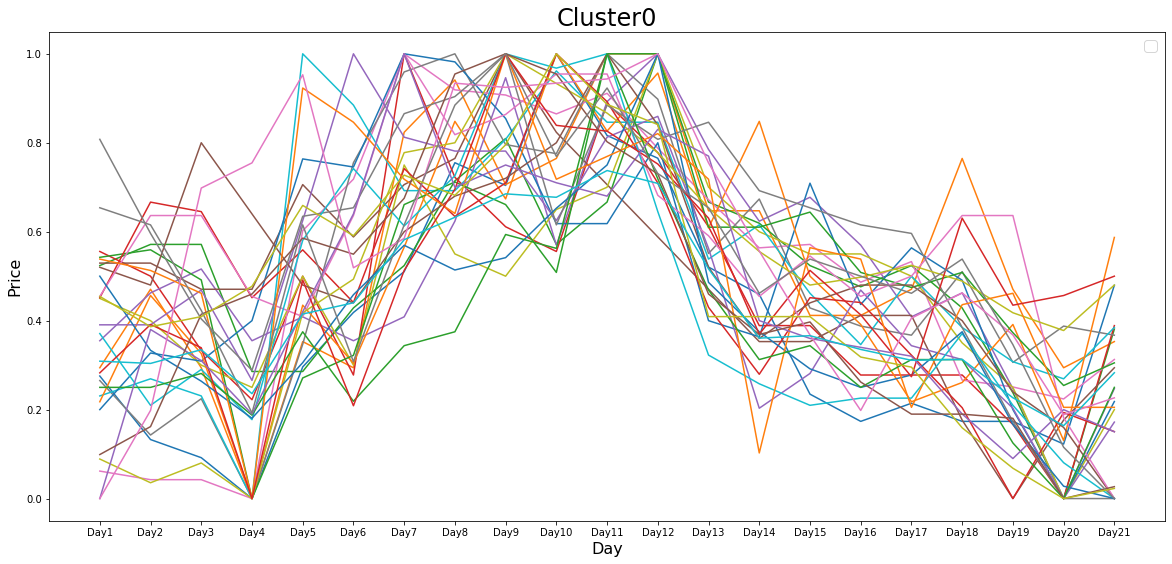

In [ ]:
# 시각화
plt.figure(figsize=(20,9))
#plt.plot(C0['mean'],'r', linewidth=5)#, marker='|', mec='black', mew=3, ms=10)
plt.title("Cluster0", fontsize=24)
plt.xlabel("Day", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.legend(labels=['C0_Mean'], loc='best', fontsize=16)
plt.plot(C0_trans.loc[C0_ind,C0_trans.columns[:21]].transpose())#, alpha=0.2)

In [ ]:
# 군집의 중심점과 가까운 30개의 종목 선정
C1_trans = C1.transpose()
C1_list = []
for i in range(len(C1_trans)):
    temp = C1_trans.iloc[i,:].to_numpy()
    temp = temp.reshape(-1,1)
    C1_list.append(cosine_similarity(km_center[1].T, temp.T)[0][0])

C1_trans['cos_sim'] = C1_list

C1_trans['rank_by_min'] = C1_trans['cos_sim'].rank(method='min', ascending=False)
rank_C1=C1_trans['rank_by_min']
C1_ind= rank_C1[rank_C1<=30].index
C1_ind

Index(['DB하이텍', 'HMM', 'SK가스', 'SNT모티브', '범양건영', '엠씨넥스', 'CBI', '디바이스이엔지',
       '디와이피엔에프', '브리지텍', '서한', '성우테크론', '셀리드', '씨큐브', '아이씨케이', '엑스큐어',
       '원익QnC', '유비벨록스', '인산가', '제넨바이오', '제노포커스', '진로발효', '케이엔제이', '코웰패션',
       '큐리언트', '티에스이', '파나진', '한국큐빅', '한컴위드', 'mean'],
      dtype='object', name='Name')

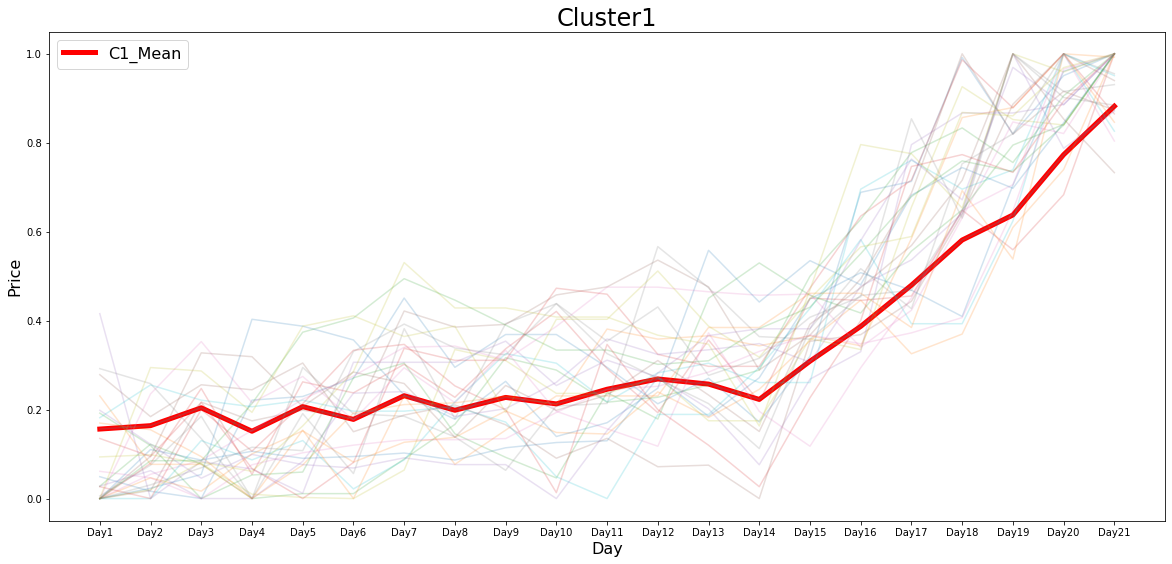

In [ ]:
# 시각화
plt.figure(figsize=(20,9))
plt.plot(C1['mean'],'r', linewidth=5)#, marker='|', mec='black', mew=3, ms=10)
plt.title("Cluster1", fontsize=24)
plt.xlabel("Day", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.legend(labels=['C1_Mean'], loc='best', fontsize=16)
plt.plot(C1_trans.loc[C1_ind,C1_trans.columns[:21]].transpose(), alpha=0.2)

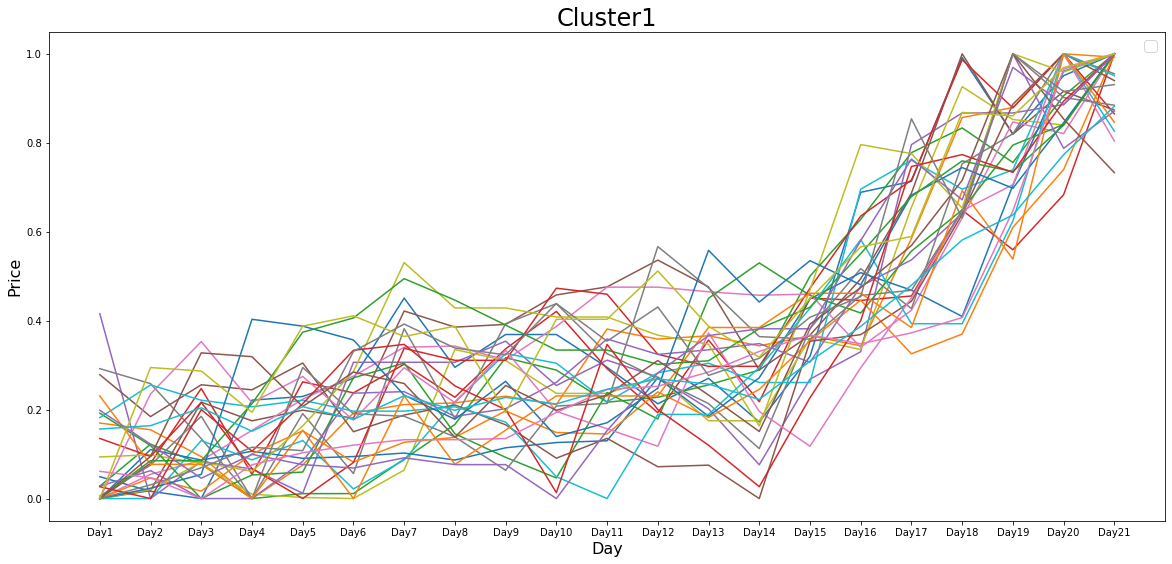

In [ ]:
# 시각화
plt.figure(figsize=(20,9))
#plt.plot(C1['mean'],'r', linewidth=5)#, marker='|', mec='black', mew=3, ms=10)
plt.title("Cluster1", fontsize=24)
plt.xlabel("Day", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.legend(labels=['C1_Mean'], loc='best', fontsize=16)
plt.plot(C1_trans.loc[C1_ind,C1_trans.columns[:21]].transpose()) #alpha=0.2)

In [ ]:
# 군집의 중심점과 가까운 30개의 종목 선정
C2_trans = C2.transpose()
C2_list = []
for i in range(len(C2_trans)):
    temp = C2_trans.iloc[i,:].to_numpy()
    temp = temp.reshape(-1,1)
    C2_list.append(cosine_similarity(km_center[2].T, temp.T)[0][0])

C2_trans['cos_sim'] = C2_list

C2_trans['rank_by_min'] = C2_trans['cos_sim'].rank(method='min', ascending=False)
rank_C2=C2_trans['rank_by_min']
C2_ind= rank_C2[rank_C2<=30].index
C2_ind

Index(['GS리테일', 'SBS', 'SK증권', '부산주공', '센트랄모텍', '에이블씨엔씨', '이엔플러스', '한국가스공사',
       '한국전자홀딩스', 'JTC', 'NE능률', 'SGA솔루션즈', '뉴인텍', '매일유업', '매일홀딩스', '메이슨캐피탈',
       '배럴', '비보존 헬스케어', '소리바다', '엔피디', '연이비앤티', '윙입푸드', '유비쿼스홀딩스', '이원컴포텍',
       '제로투세븐', '카페24', '티비씨', '플레이디', '하이즈항공', 'mean'],
      dtype='object', name='Name')

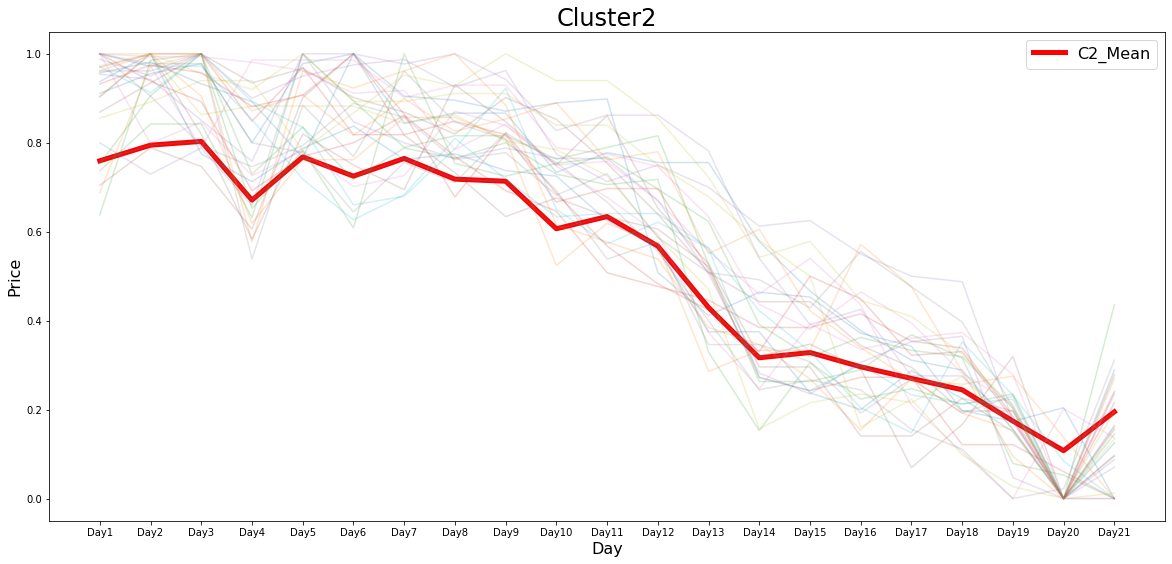

In [ ]:
# 시각화
plt.figure(figsize=(20,9))
plt.plot(C2['mean'],'r', linewidth=5)#, marker='|', mec='black', mew=3, ms=10)
plt.title("Cluster2", fontsize=24)
plt.xlabel("Day", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.legend(labels=['C2_Mean'], loc='best', fontsize=16)
plt.plot(C2_trans.loc[C2_ind,C2_trans.columns[:21]].transpose(), alpha=0.2)

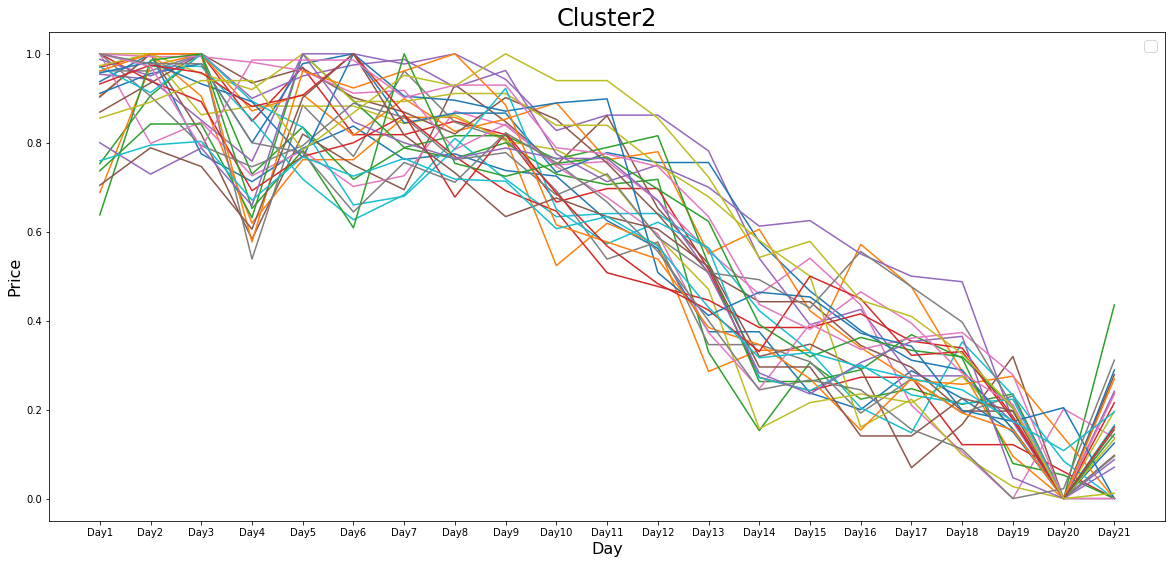

In [ ]:
# 시각화
plt.figure(figsize=(20,9))
#plt.plot(C2['mean'],'r', linewidth=5)#, marker='|', mec='black', mew=3, ms=10)
plt.title("Cluster2", fontsize=24)
plt.xlabel("Day", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.legend(labels=['C2_Mean'], loc='best', fontsize=16)
plt.plot(C2_trans.loc[C2_ind,C2_trans.columns[:21]].transpose())#, alpha=0.2)

In [ ]:
# 군집의 중심점과 가까운 30개의 종목 선정
C3_trans = C3.transpose()
C3_list = []
for i in range(len(C3_trans)):
    temp = C3_trans.iloc[i,:].to_numpy()
    temp = temp.reshape(-1,1)
    C3_list.append(cosine_similarity(km_center[3].T, temp.T)[0][0])

C3_trans['cos_sim'] = C3_list

C3_trans['rank_by_min'] = C3_trans['cos_sim'].rank(method='min', ascending=False)
rank_C3=C3_trans['rank_by_min']
C3_ind= rank_C3[rank_C3<=30].index
C3_ind

Index(['경동나비엔', '까뮤이앤씨', '두올', '이마트', '일진다이아', '진양홀딩스', '진흥기업', 'JYP Ent.',
       'PN풍년', 'WI', '국보디자인', '대유에이피', '데이타솔루션', '삼일기업공사', '삼진', '에이스테크',
       '에이텍티앤', '엔피케이', '오리엔트정공', '와이솔', '유니테스트', '유비케어', '육일씨엔에쓰', '이글루시큐리티',
       '이노와이어리스', '케이티알파', '테크윙', '파인테크닉스', '파크시스템스', 'mean'],
      dtype='object', name='Name')

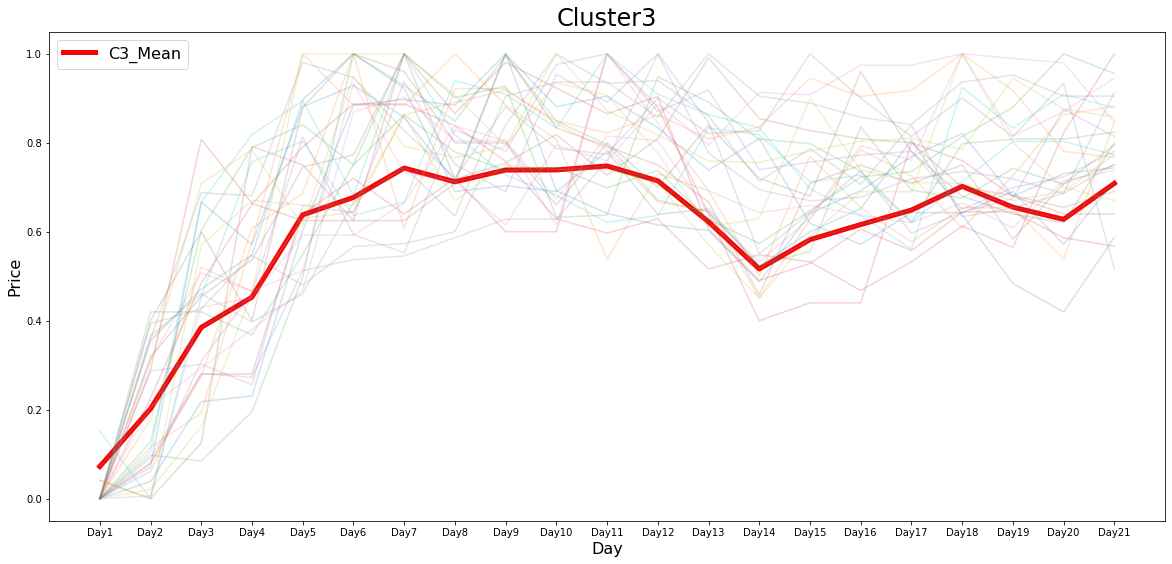

In [ ]:
# 시각화
plt.figure(figsize=(20,9))
plt.plot(C3['mean'],'r', linewidth=5)#, marker='|', mec='black', mew=3, ms=10)
plt.title("Cluster3", fontsize=24)
plt.xlabel("Day", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.legend(labels=['C3_Mean'], loc='best', fontsize=16)
plt.plot(C3_trans.loc[C3_ind,C3_trans.columns[:21]].transpose(), alpha=0.2)

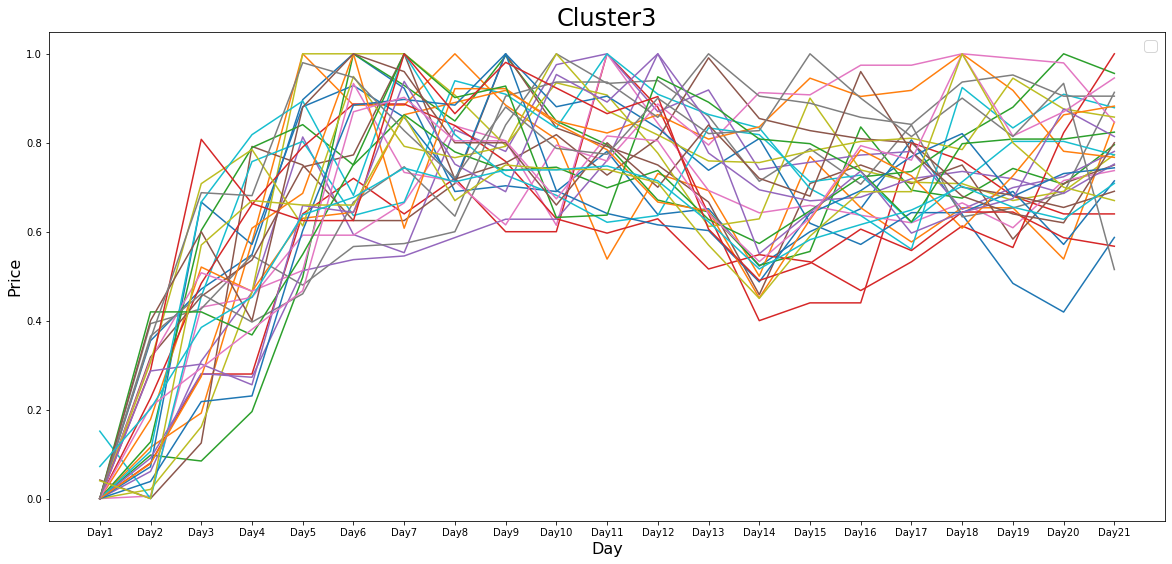

In [ ]:
# 시각화
plt.figure(figsize=(20,9))
#plt.plot(C3['mean'],'r', linewidth=5), marker='|', mec='black', mew=3, ms=10)
plt.title("Cluster3", fontsize=24)
plt.xlabel("Day", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.legend(labels=['C3_Mean'], loc='best', fontsize=16)
plt.plot(C3_trans.loc[C3_ind,C3_trans.columns[:21]].transpose())# alpha=0.2)

In [ ]:
# 군집의 중심점과 가까운 30개의 종목 선정
C4_trans = C4.transpose()
C4_list = []
for i in range(len(C4_trans)):
    temp = C4_trans.iloc[i,:].to_numpy()
    temp = temp.reshape(-1,1)
    C4_list.append(cosine_similarity(km_center[4].T, temp.T)[0][0])

C4_trans['cos_sim'] = C4_list

C4_trans['rank_by_min'] = C4_trans['cos_sim'].rank(method='min', ascending=False)
rank_C4=C4_trans['rank_by_min']
C4_ind= rank_C4[rank_C4<=30].index
C4_ind

Index(['LG이노텍', '농심', '성보화학', '엔에스쇼핑', '오뚜기', '유니퀘스트', '포스코케미칼', '풍산홀딩스',
       '하이트진로홀딩스', '한국수출포장', '링크제니시스', '미스터블루', '버킷스튜디오', '선데이토즈', '썸에이지',
       '에이루트', '제이씨현시스템', '제테마', '코드네이처', '큐에스아이', '크린앤사이언스', '클래시스', '펌텍코리아',
       '포시에스', '플레이위드', '필옵틱스', '한솔인티큐브', '홈캐스트', '힘스', 'mean'],
      dtype='object', name='Name')

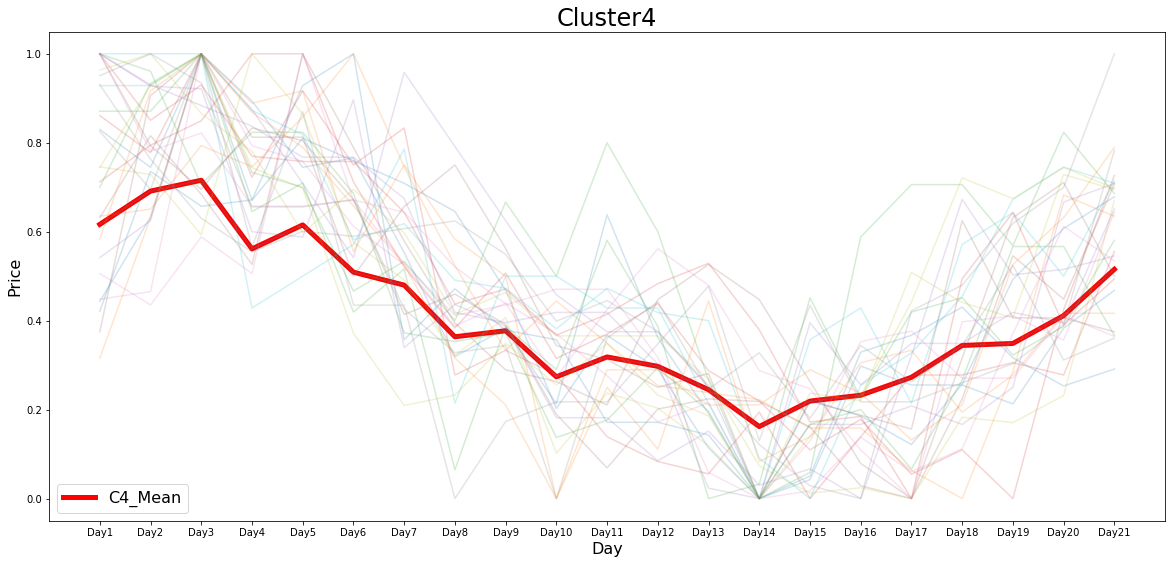

In [ ]:
# 시각화
plt.figure(figsize=(20,9))
plt.plot(C4['mean'],'r', linewidth=5)#, marker='|', mec='black', mew=3, ms=10)
plt.title("Cluster4", fontsize=24)
plt.xlabel("Day", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.legend(labels=['C4_Mean'], loc='best', fontsize=16)
plt.plot(C4_trans.loc[C4_ind,C4_trans.columns[:21]].transpose(), alpha=0.2)

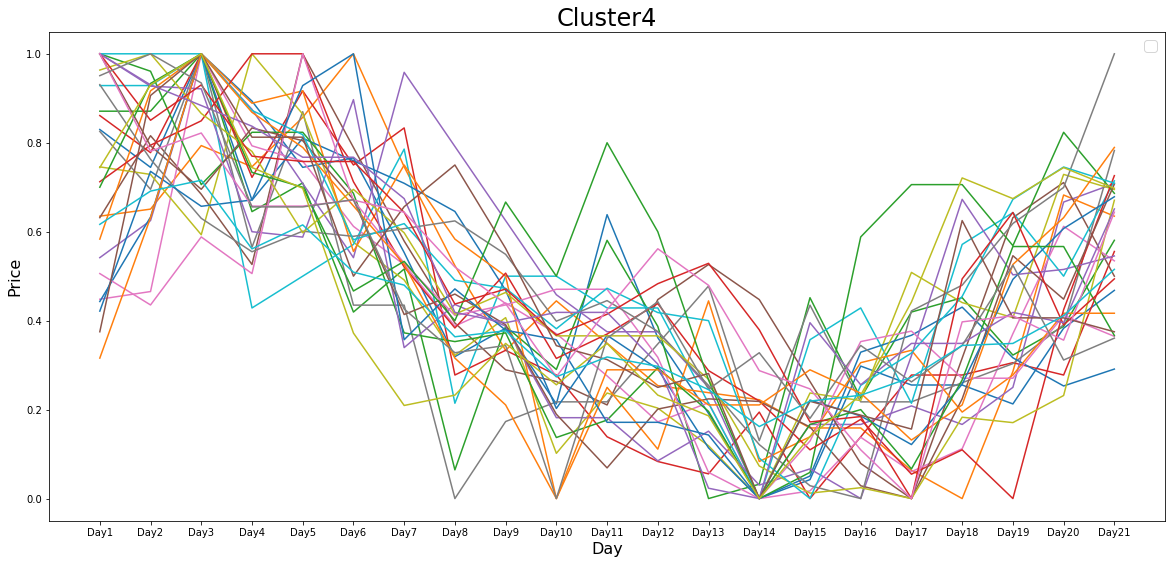

In [ ]:
# 시각화
plt.figure(figsize=(20,9))
#plt.plot(C4['mean'],'r', linewidth=5)#, marker='|', mec='black', mew=3, ms=10)
plt.title("Cluster4", fontsize=24)
plt.xlabel("Day", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.legend(labels=['C4_Mean'], loc='best', fontsize=16)
plt.plot(C4_trans.loc[C4_ind,C4_trans.columns[:21]].transpose())#, alpha=0.2)

In [ ]:
# 군집의 중심점과 가까운 30개의 종목 선정
C5_trans = C5.transpose()
C5_list = []
for i in range(len(C5_trans)):
    temp = C5_trans.iloc[i,:].to_numpy()
    temp = temp.reshape(-1,1)
    C5_list.append(cosine_similarity(km_center[5].T, temp.T)[0][0])

C5_trans['cos_sim'] = C5_list

C5_trans['rank_by_min'] = C5_trans['cos_sim'].rank(method='min', ascending=False)
rank_C5=C5_trans['rank_by_min']
C5_ind= rank_C5[rank_C5<=30].index
C5_ind

Index(['DB금융투자', 'NH투자증권', '금강공업', '대유플러스', '삼성증권', '인터지스', '지역난방공사', '하나금융지주',
       '한국금융지주', '한국카본', '현대비앤지스틸', '현대제철', '휴스틸', 'SK머티리얼즈', '나인테크', '비츠로셀',
       '빛샘전자', '성우전자', '성우하이텍', '아이티센', '에스에이티', '에스엘바이오닉스', '에프알텍', '에프앤가이드',
       '오이솔루션', '이베스트투자증권', '케이엠더블유', '프리엠스', '피엔에이치테크', 'mean'],
      dtype='object', name='Name')

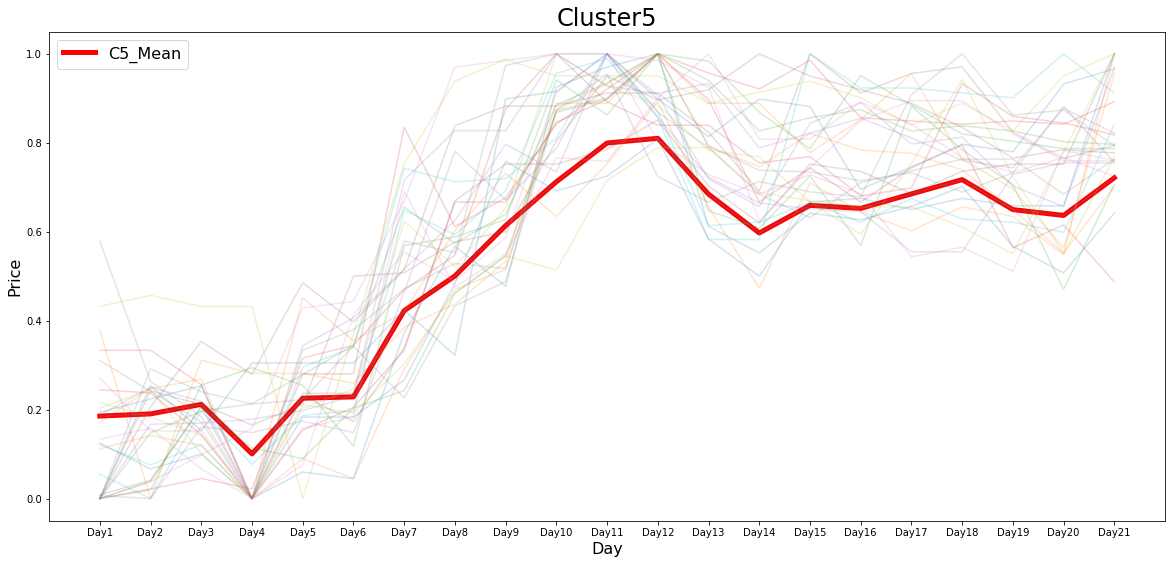

In [ ]:
# 시각화
plt.figure(figsize=(20,9))
plt.plot(C5['mean'],'r', linewidth=5)#, marker='|', mec='black', mew=3, ms=10)
plt.title("Cluster5", fontsize=24)
plt.xlabel("Day", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.legend(labels=['C5_Mean'], loc='best', fontsize=16)
plt.plot(C5_trans.loc[C5_ind,C5_trans.columns[:21]].transpose(), alpha=0.2)

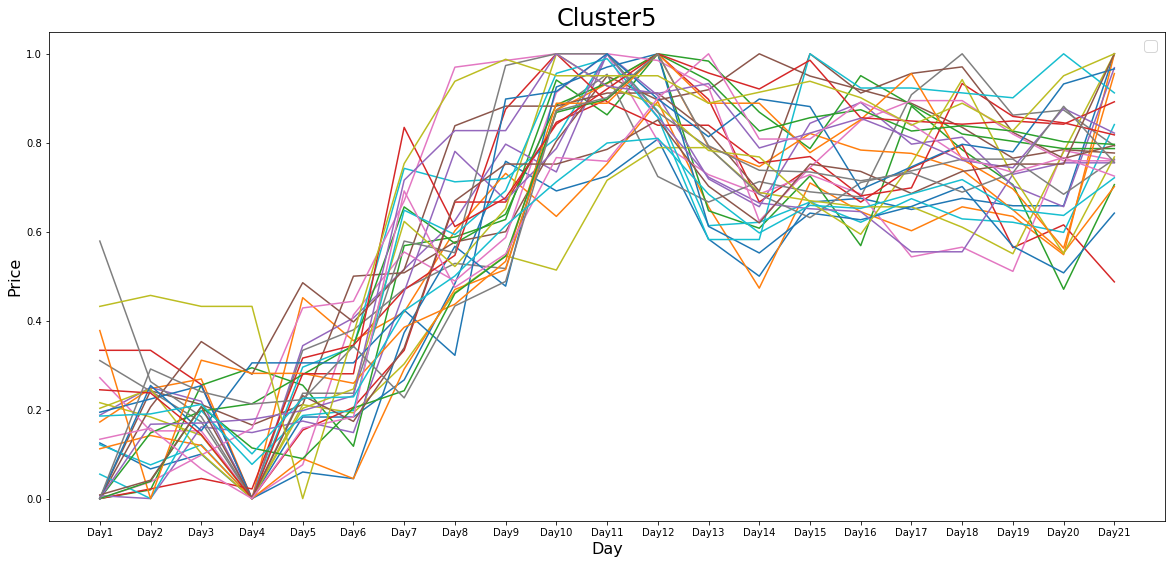

In [ ]:
# 시각화
plt.figure(figsize=(20,9))
# plt.plot(C5['mean'],'r', linewidth=5)#, marker='|', mec='black', mew=3, ms=10)
plt.title("Cluster5", fontsize=24)
plt.xlabel("Day", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.legend(labels=['C5_Mean'], loc='best', fontsize=16)
plt.plot(C5_trans.loc[C5_ind,C5_trans.columns[:21]].transpose())#, alpha=0.2)

In [ ]:
# 군집의 중심점과 가까운 30개의 종목 선정
C6_trans = C6.transpose()
C6_list = []
for i in range(len(C6_trans)):
    temp = C6_trans.iloc[i,:].to_numpy()
    temp = temp.reshape(-1,1)
    C6_list.append(cosine_similarity(km_center[6].T, temp.T)[0][0])

C6_trans['cos_sim'] = C6_list

C6_trans['rank_by_min'] = C6_trans['cos_sim'].rank(method='min', ascending=False)
rank_C6=C6_trans['rank_by_min']
C6_ind= rank_C6[rank_C6<=30].index
C6_ind

Index(['DI동일', 'LIG넥스원', 'SK케미칼', '강남제비스코', '대한방직', '디와이파워', '롯데관광개발', '미원상사',
       '아세아', '아이에스동서', '자화전자', '한미반도체', '한일시멘트', '네오티스', '메드팩토', '바이넥스',
       '삼강엠앤티', '서린바이오', '신진에스엠', '씨이랩', '아바텍', '에스티팜', '엔케이맥스', '엠투엔',
       '오킨스전자', '유라테크', '유진기업', '켐트로닉스', '태웅', 'mean'],
      dtype='object', name='Name')

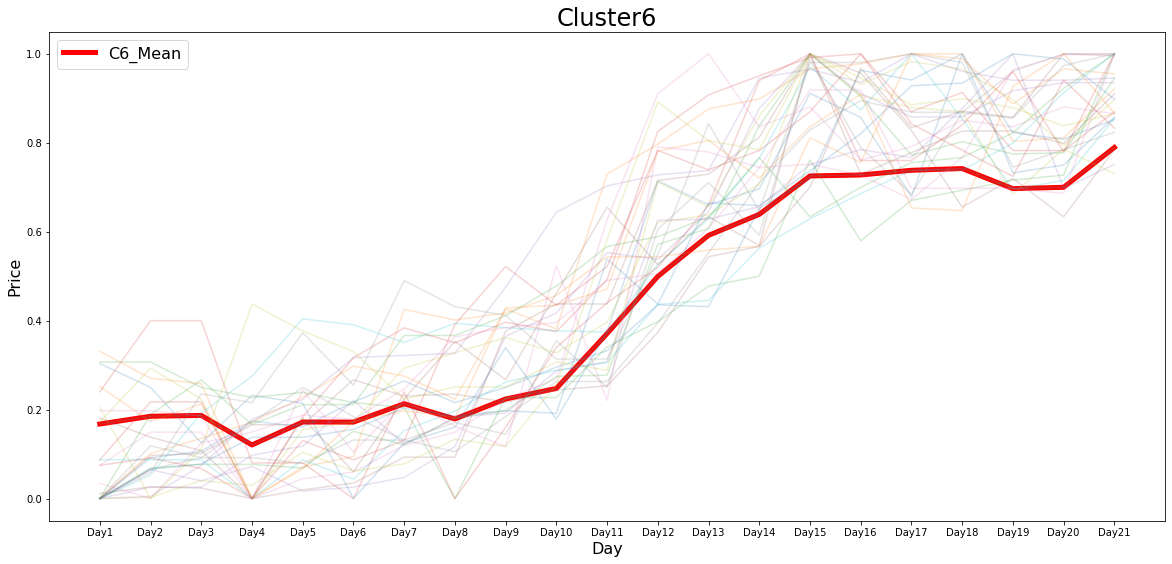

In [ ]:
# 시각화
plt.figure(figsize=(20,9))
plt.plot(C6['mean'],'r', linewidth=5)#, marker='|', mec='black', mew=3, ms=10)
plt.title("Cluster6", fontsize=24)
plt.xlabel("Day", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.legend(labels=['C6_Mean'], loc='best', fontsize=16)
plt.plot(C6_trans.loc[C6_ind,C6_trans.columns[:21]].transpose(), alpha=0.2)

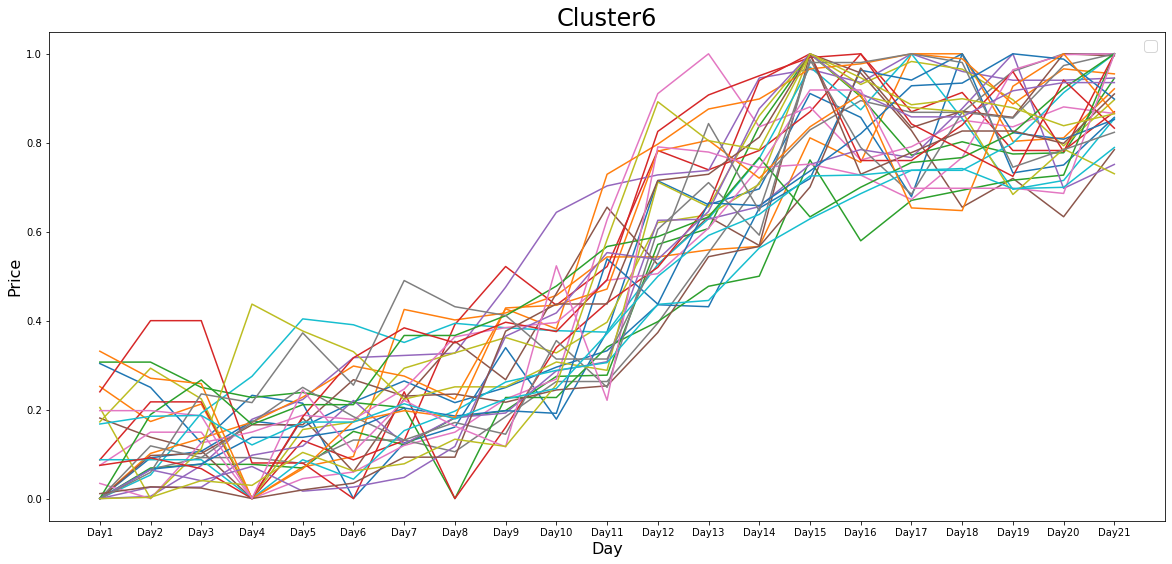

In [ ]:
# 시각화
plt.figure(figsize=(20,9))
# plt.plot(C6['mean'],'r', linewidth=5)#, marker='|', mec='black', mew=3, ms=10)
plt.title("Cluster6", fontsize=24)
plt.xlabel("Day", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.legend(labels=['C6_Mean'], loc='best', fontsize=16)
plt.plot(C6_trans.loc[C6_ind,C6_trans.columns[:21]].transpose())#, alpha=0.2)

In [ ]:
# 분석 끝!